In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

In [1]:
import numpy as np
import tensorflow as tf 
import matplotlib.pyplot as plt 
import cv2 
import utils 

%matplotlib inline 

# Simple neural network 

This notebook will build a simple neural network on flattened image data.  After assessing performance, we'll try out a conv net. 

## Load data 

In [3]:
import glob
imgs_filenames = glob.glob("data/cat/orange/*.jpg")
imgs_filenames

['data/cat/orange\\cat01.jpg',
 'data/cat/orange\\cat02.jpg',
 'data/cat/orange\\cat03.jpg',
 'data/cat/orange\\cat04.jpg',
 'data/cat/orange\\cat05.jpg',
 'data/cat/orange\\cat06.jpg',
 'data/cat/orange\\cat07.jpg',
 'data/cat/orange\\cat08.jpg']

In [14]:
w_size = 13

X, y = utils.imgs_to_dataset(imgs_filenames, squeeze=True, padding=w_size+2, window_size=w_size)
X.shape, y.shape 

((80000, 169), (80000, 3))

In [15]:
X = utils.normalize(X)
y = utils.normalize(y)

## Model building 

In [16]:
from tensorflow.keras.layers import Dense, InputLayer

In [17]:
model = tf.keras.Sequential([ 
    Dense(100, input_shape=(w_size**2, ), activation='sigmoid'), 
    Dense(50, activation='relu'), 
    Dense(3, activation='relu')
])

model.compile(optimizer='adam', loss='mse')  

In [18]:
history = model.fit(X, y, epochs=100, verbose=2)

Train on 80000 samples
Epoch 1/100
80000/80000 - 2s - loss: 0.1204
Epoch 2/100
80000/80000 - 2s - loss: 0.0997
Epoch 3/100
80000/80000 - 2s - loss: 0.0937
Epoch 4/100
80000/80000 - 2s - loss: 0.0936
Epoch 5/100
80000/80000 - 2s - loss: 0.0935
Epoch 6/100
80000/80000 - 2s - loss: 0.0934
Epoch 7/100
80000/80000 - 2s - loss: 0.0934
Epoch 8/100
80000/80000 - 2s - loss: 0.0933
Epoch 9/100
80000/80000 - 2s - loss: 0.0933
Epoch 10/100
80000/80000 - 2s - loss: 0.0933
Epoch 11/100
80000/80000 - 2s - loss: 0.0933
Epoch 12/100
80000/80000 - 2s - loss: 0.0932
Epoch 13/100
80000/80000 - 2s - loss: 0.0445
Epoch 14/100
80000/80000 - 2s - loss: 0.0050
Epoch 15/100
80000/80000 - 2s - loss: 0.0048
Epoch 16/100
80000/80000 - 2s - loss: 0.0047
Epoch 17/100
80000/80000 - 2s - loss: 0.0046
Epoch 18/100
80000/80000 - 2s - loss: 0.0045
Epoch 19/100
80000/80000 - 2s - loss: 0.0045
Epoch 20/100
80000/80000 - 2s - loss: 0.0044
Epoch 21/100
80000/80000 - 2s - loss: 0.0043
Epoch 22/100
80000/80000 - 2s - loss: 0.0

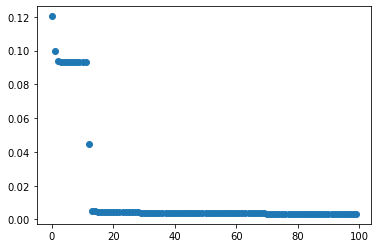

In [19]:
l = history.history['loss']
plt.scatter(np.arange(len(l)), l)

## Testing 

In [28]:
test_img_path = 'data/cat/orange/cat01.jpg'
test_img = utils.Image(test_img_path, padding=w_size+2)
X_test, y_test = utils.img_to_dataset(test_img, window_size=w_size)  

y_pred = model.predict(X_test)

In [29]:
colored = utils.reconstruct_from_vectors(blue=y_pred[:, 0], green=y_pred[:, 1], 
                                         red=y_pred[:, 2], dimension=100)
colored = utils.to_255_scale(colored)

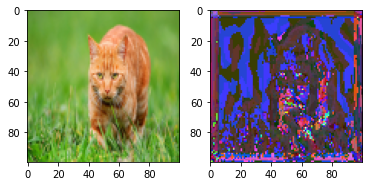

In [30]:
fig, axes = plt.subplots(1, 2)
axes[0].imshow(cv2.cvtColor(test_img.data_nopadding, cv2.COLOR_BGR2RGB))
axes[1].imshow(cv2.cvtColor(colored.astype('uint8'), cv2.COLOR_BGR2RGB))

In [32]:
colored

array([[[ 83, 139,  37],
        [  8, 102, 173],
        [ 43, 110, 209],
        ...,
        [253,  65,  56],
        [ 14,  43, 128],
        [ 59,  58, 120]],

       [[122, 121,  59],
        [191,  98, 109],
        [172,  93, 175],
        ...,
        [163,  54, 153],
        [194,  60, 151],
        [197,  71, 141]],

       [[ 34,  98, 179],
        [127, 102,  88],
        [209, 106, 170],
        ...,
        [151,  46, 172],
        [155,  48, 219],
        [150,  57, 132]],

       ...,

       [[ 17,  10, 146],
        [ 90,  11, 139],
        [ 86,  30, 182],
        ...,
        [173,  24, 168],
        [123,  35,  91],
        [ 67,  11, 159]],

       [[126,  42, 203],
        [189,  10,   7],
        [115,  15,  16],
        ...,
        [103, 252, 131],
        [ 95,  35,  56],
        [130,  16, 183]],

       [[175, 252, 234],
        [  6, 242,  92],
        [115,  18,  14],
        ...,
        [137,  40,  88],
        [132,  40, 102],
        [247,  23,  97]]